In [ ]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Regressão Linear, Faça você mesmo

In [26]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [4]:
# Carregamento da base de dados e exclusão da primeiro coluna
diretorio_atual = os.getcwd()
caminho_pasta_mae = os.path.abspath(os.path.join(diretorio_atual, ".."))
caminho_pasta_dados = os.path.join(caminho_pasta_mae, "dados")
caminho_arquivo = os.path.join(caminho_pasta_dados, "slr12.csv")
base = pd.read_csv(caminho_arquivo, sep=';')
base.shape

(36, 2)

In [5]:
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [31]:
# Criação de X e Y: variável independente e variável dependente
# Cálculo da correlação entre X e Y
X = base.iloc[:, 0].values 
y = base.iloc[:, 1].values 
X

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850], dtype=int64)

In [32]:
correlacao = np.corrcoef(X, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [33]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1) 
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [40]:
# Visualização dos coeficientes
modelo.intercept_

867.6042222620559

In [41]:
#inclinacao
modelo.coef_

array([0.37315794])

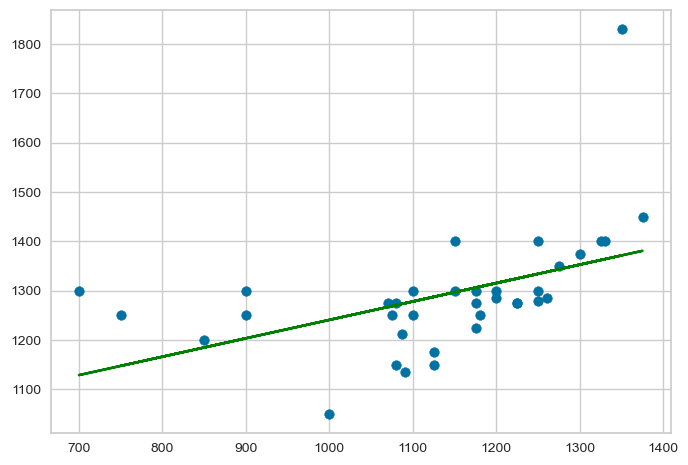

In [36]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'green')

In [42]:
# Previsão do "Investimento Inicial" em franquia com valor anual de R$1300 usando a fórmula manual
# interceptação * inclinação * valor anual
modelo.intercept_ + modelo.coef_ * 1300

array([1352.70953897])

In [38]:
# Previsão utilizando função do sklearn
modelo.predict([[1300]])

array([1352.70953897])

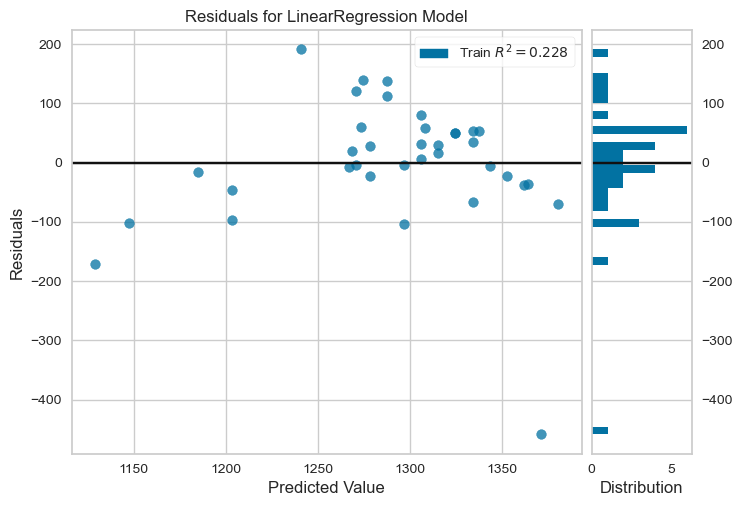

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [39]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()